In [172]:
import numpy as np 
from itertools import combinations
from tqdm import tqdm

# Total variation on a graph cellular sheaf

Now we'll design a toy example where the total variation is zero by construction, yielding so a problem with a closed form solution. 
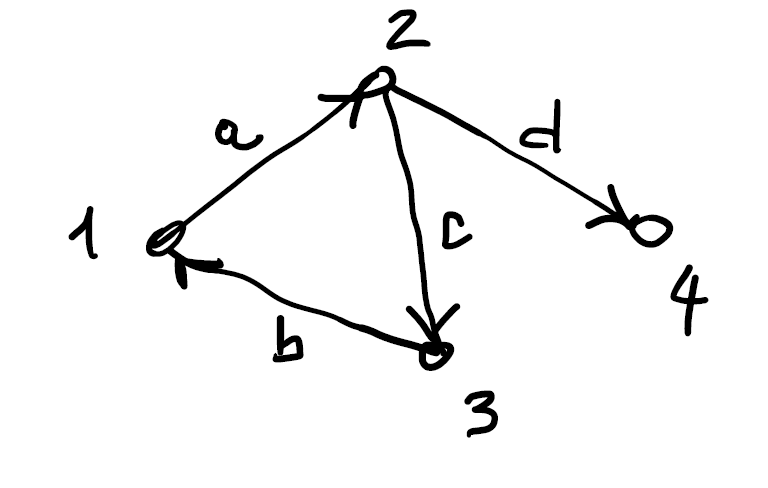

The coboundary map is the following: 
\begin{bmatrix}
    -F_{a1} & F_{b1} & 0 & 0 \\
    F_{a2} & 0 & -F_{c2} & -F_{d2} \\
    0 & -F_{b3} & F_{c3} & 0 \\
    0 & 0 & 0 & F_{d4}
\end{bmatrix}

Now we'll sample $x_1$ at random and then define:
$$x_2 = F_{a1}^T x_1$$
$$x_3 = F_{b3}^T x_1$$
$$x_4 = F_{d2}^T F_{a1}^T x_1$$

The following choices for the linear maps should yield a total variation equal to zero: 
+ $F_{a1}$ random, $F_{a2}$ = $\mathbb{I}$;
+ $F_{b3}$ random, $F_{b1}$ = $\mathbb{I}$;
+ $F_{c2} = F_{a1}^{-1}F_{b3}^{-1}$, $F_{c3}$ = $\mathbb{I}$;
+ $F_{d2}$ random, $F_{d4}$ = $\mathbb{I}$;

In [173]:
V = 4
edges = [
    (0,1),
    (1,2),
    (1,3),
    (0,2)
]

nodes = [i for i in range(V)]
E = len(edges)
d = 5

In [174]:
# Linear maps generation

F_a2 = np.eye(d)
F_c3 = np.eye(d)
F_d4 = np.eye(d)
F_b1 = np.eye(d)

F_b3 = np.random.randn(d,d)
F_a1 = np.random.randn(d,d)
F_c2 = np.linalg.inv(F_a1) @ np.linalg.inv(F_b3)
F_d2 = np.random.randn(d,d)

In [175]:
# Coboundary map

B1 = np.zeros((E*d, V*d))

B1[0:5, 0:5] = -F_a1
B1[0:5, 5:10] = F_b1
B1[5:10, 0:5] = F_a2
B1[5:10, 10:15] = -F_c2
B1[5:10, 15:20] = -F_d2
B1[10:15, 5:10] = -F_b3
B1[10:15, 10:15] = F_c3
B1[15:20, 15:20] = F_d4

In [176]:
# Sheaf Laplacian

L = B1 @ B1.T

In [177]:
X.shape

(20, 100)

In [178]:
N = 100

x_1 = np.random.randn(d,N)
x_2 = F_a1.T @ x_1
x_3 = np.linalg.inv(F_b3.T) @ x_1
x_4 = F_d2.T @ F_a1.T @ x_1

X = np.vstack([x_1, x_2, x_3, x_4])

In [179]:
np.trace(X.T @ L @ X)

1.523144803438717e-09

In [180]:
F_a2.T @ x_2 - F_a1.T @ x_1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [181]:
F_b1.T @ x_1 - F_b3.T @ x_3

array([[-5.55111512e-17, -2.22044605e-16,  2.77555756e-17,
        -1.11022302e-16,  2.22044605e-16, -1.66533454e-16,
         0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
        -2.22044605e-16,  1.11022302e-16,  0.00000000e+00,
         0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.22044605e-16, -2.22044605e-16,  0.00000000e+00,
         6.33174069e-17,  2.22044605e-16,  4.44089210e-16,
         2.22044605e-16,  1.11022302e-16, -5.55111512e-17,
         0.00000000e+00, -5.55111512e-17,  1.66533454e-16,
         0.00000000e+00,  0.00000000e+00, -1.11022302e-16,
         0.00000000e+00, -2.22044605e-16,  8.32667268e-17,
         0.00000000e+00,  0.00000000e+00, -3.33066907e-16,
         0.00000000e+00,  0.00000000e+00, -5.55111512e-17,
        -5.42101086e-17,  0.00000000e+00,  4.16333634e-17,
        -2.22044605e-16,  0.00000000e+00, -1.11022302e-1

In [182]:
F_c3.T @ x_3 - F_c2.T @ x_2

array([[ 2.99760217e-15, -1.99840144e-15,  4.88498131e-15,
        -4.77395901e-15,  1.33226763e-15, -5.10702591e-15,
        -1.77635684e-15, -7.99360578e-15,  7.10542736e-15,
         5.24580379e-15,  7.38298311e-15,  2.44249065e-15,
         2.60902411e-15,  1.43218770e-14,  1.55431223e-15,
        -5.55111512e-16, -3.10862447e-15, -3.78863607e-15,
         4.21884749e-15, -8.54871729e-15,  2.44249065e-15,
         5.99520433e-15, -5.77315973e-15,  5.99520433e-15,
         2.77555756e-16, -4.44089210e-16, -2.22044605e-15,
        -1.55431223e-14,  5.32907052e-15, -3.49720253e-15,
        -7.54951657e-15,  6.77236045e-15, -7.38298311e-15,
        -1.24344979e-14, -1.88737914e-15, -3.77475828e-15,
        -8.88178420e-16, -2.22044605e-15, -1.05471187e-14,
         1.26565425e-14, -2.44249065e-15, -1.62092562e-14,
        -3.55271368e-15,  5.66213743e-15,  7.07767178e-15,
         4.16333634e-16, -1.22124533e-15,  4.44089210e-16,
         6.43929354e-15,  4.82947016e-15,  5.55111512e-1

In [183]:
F_d4.T @ x_4 - F_d2.T @ x_2

array([[ 2.22044605e-16, -4.44089210e-16,  3.33066907e-16,
        -4.44089210e-16, -2.22044605e-16,  2.22044605e-16,
        -9.71445147e-17, -4.44089210e-16,  4.44089210e-16,
         0.00000000e+00,  0.00000000e+00, -4.44089210e-16,
         5.55111512e-17,  4.44089210e-16,  8.88178420e-16,
        -2.22044605e-16,  4.44089210e-16,  2.22044605e-16,
        -2.22044605e-16, -3.33066907e-16, -2.22044605e-16,
         4.44089210e-16,  4.44089210e-16, -3.33066907e-16,
        -3.33066907e-16,  2.22044605e-16, -1.11022302e-16,
        -8.88178420e-16, -1.11022302e-16,  0.00000000e+00,
         2.22044605e-16,  2.22044605e-16,  0.00000000e+00,
         8.88178420e-16, -2.22044605e-16,  4.44089210e-16,
         0.00000000e+00, -2.22044605e-16, -1.11022302e-16,
        -2.22044605e-16,  8.88178420e-16,  4.44089210e-16,
         0.00000000e+00,  0.00000000e+00, -1.38777878e-16,
         0.00000000e+00,  2.22044605e-16,  2.22044605e-16,
         8.88178420e-16,  0.00000000e+00,  2.77555756e-1

In [184]:
B1.T @ X

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.88178420e-16,  0.00000000e+00,  0.00000000e+00, ...,
        -1.77635684e-15, -3.55271368e-15,  1.77635684e-15],
       [-4.44089210e-16,  0.00000000e+00, -4.44089210e-16, ...,
         0.00000000e+00,  4.44089210e-16,  0.00000000e+00],
       [ 0.00000000e+00,  4.44089210e-16,  0.00000000e+00, ...,
        -4.44089210e-16,  8.88178420e-16, -8.88178420e-16]])

_____________________

In [185]:
# Alternated Linear Maps Learning

def ALML(X_u, X_v, d, lambda_v = 0.5, lambda_u = 0.5, T = 500):
    # Initialization 

    F_u = np.random.randn(d,d)
    F_v = np.random.randn(d,d)
    gamma = 0.99

    # This matrices can be computed out of the learning loop 

    vu = X_v @ X_u.T
    uv = X_u @ X_v.T
    uu = np.linalg.inv(X_u @ X_u.T)
    vv = np.linalg.inv(X_v @ X_v.T)

    # Alternated learning through blockwise convex programs

    for _ in range(T): 

        # Local step

        # Close form without regularization
        F_u_hat = F_v @ vu @ uu 
        F_v_hat = F_u @ uv @ vv 

        # Proximal mapping
        s_u, U_u = np.linalg.eig(F_u_hat)
        z_u = 0.5*(s_u + np.sqrt(s_u**2 + 4*lambda_u))
        F_u_hat = U_u @ np.diag(z_u) @ U_u.T
        
        s_v, U_v = np.linalg.eig(F_v_hat)
        z_v = 0.5*(s_v + np.sqrt(s_v**2 + 4*lambda_v))
        F_v_hat = U_v @ np.diag(z_v) @ U_v.T
        
        '''
        # Pseudo solving
        F_u_hat = pseudo_solver_A(F_u, F_v, X_u, X_v, lambda_u)
        F_v_hat = pseudo_solver_A(F_v, F_v, X_u, X_v, lambda_u)
        '''
        # Convex smoothing
        F_u = F_u + gamma*(F_u_hat - F_u)
        F_v = F_v + gamma*(F_v_hat - F_v)

        gamma *= 0.9
        
    return F_u, F_v 

In [186]:
all_edges = list(combinations(nodes, 2))
maps = {
    e:{
        e[0] : np.zeros((3,3)), 
        e[1] : np.zeros((3,3))
        } 
    for e in all_edges
    }

energies = {
    e : 0
    for e in all_edges
    }

In [187]:
for e in tqdm(all_edges):
    u = e[0]
    v = e[1]

    X_u = X[u*d:(u+1)*d,:]
    X_v = X[v*d:(v+1)*d,:]

    F_u, F_v = ALML(X_u, X_v, d, T = 500)

    maps[e][u] = F_u
    maps[e][v] = F_v

    L = 0

    for i in range(100):
        x_u = X_u[:,i]
        x_v = X_v[:,i]
        L += np.linalg.norm(F_u @ x_u - F_v @ x_v)
        
    energies[e] = L

100%|██████████| 6/6 [00:00<00:00, 21.66it/s]


In [188]:
retrieved = sorted(energies.items(), key=lambda x:x[1])[:E]

In [189]:
retrieved

[((0, 2), 1079.0571621280744),
 ((2, 3), 1723.3877094959228),
 ((1, 3), 21148.58797465192),
 ((1, 2), 444073.4232671694)]

In [190]:
edges

[(0, 1), (1, 2), (1, 3), (0, 2)]

In [191]:
len(set(list(map(lambda x: x[0], retrieved))).intersection(set(edges))) / E

0.75